In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
from google.colab import files 
uploaded= files.upload()

Saving Logistic_X_Test.csv to Logistic_X_Test.csv
Saving Logistic_X_Train.csv to Logistic_X_Train.csv
Saving Logistic_Y_Train.csv to Logistic_Y_Train.csv
Saving SampleOutput.csv to SampleOutput.csv


In [16]:
import io
X= io.BytesIO(uploaded['Logistic_X_Train.csv'])
Y= io.BytesIO(uploaded['Logistic_Y_Train.csv'])
test= io.BytesIO(uploaded['Logistic_X_Test.csv'])

In [19]:
X= pd.read_csv(X)
X.head()

,f1,f2
0,0.574727,0.787277
1,0.251502,0.908940
2,1.860578,0.013763
3,0.019477,1.047210
4,0.029794,0.252236


In [20]:
Y= pd.read_csv(Y)
Y.head()

,label
0,0
1,0
2,1
3,0
4,1


In [21]:
test= pd.read_csv(test)
test.head()

,f1,f2
0,-0.799827,-0.003833
1,-0.757785,1.031370
2,1.036808,-0.357004
3,0.569531,1.083775
4,0.954205,-0.598412


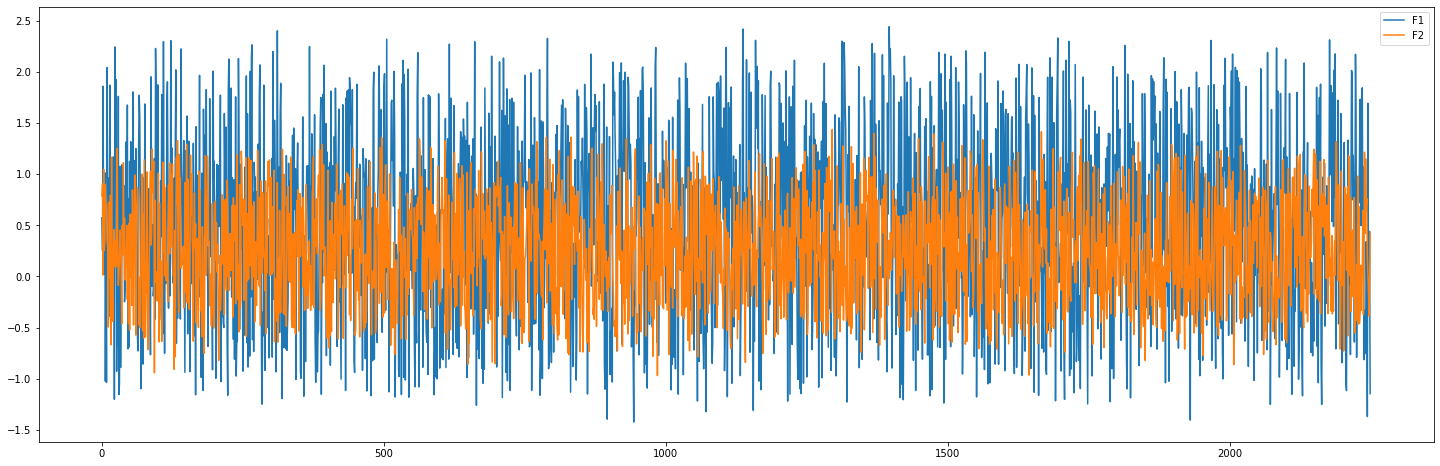

In [26]:
plt.figure(figsize=(25,8))
plt.plot(X['f1'], label='F1')
plt.plot(X['f2'], label='F2')
plt.legend()
plt.show()

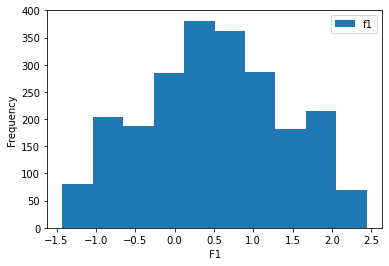

In [28]:
plt.xlabel('F1')
X["f1"].plot.hist(bins=10)
plt.legend()
plt.show()

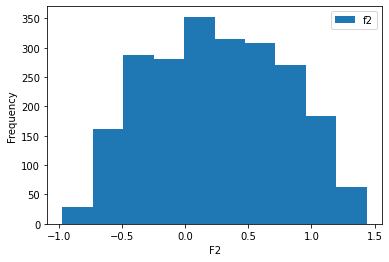

In [29]:
plt.xlabel('F2')
X["f2"].plot.hist(bins=10)
plt.legend()
plt.show()

In [74]:
from keras import models
from keras.layers import Dense

In [82]:
model= models.Sequential()
model.add(Dense(16, activation='relu', input_shape=(2,)))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [83]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [84]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 16)                48        
_________________________________________________________________
dense_14 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 17        
Total params: 337
Trainable params: 337
Non-trainable params: 0
_________________________________________________________________


In [85]:
X_val= X[:1200]
X_train_new= X[1200:]

Y_val= Y[:1200]
Y_train_new= Y[1200:]

In [86]:
hist= model.fit(X_train_new, Y_train_new, epochs=160, batch_size=100, validation_data=(X_val, Y_val))

Train on 1050 samples, validate on 1200 samples
Epoch 1/160
1050/1050 [==============================] - 0s 106us/step - loss: 0.6527 - accuracy: 0.7590 - val_loss: 0.6240 - val_accuracy: 0.8483
Epoch 2/160
1050/1050 [==============================] - 0s 25us/step - loss: 0.6092 - accuracy: 0.8610 - val_loss: 0.5892 - val_accuracy: 0.8592
Epoch 3/160
1050/1050 [==============================] - 0s 26us/step - loss: 0.5730 - accuracy: 0.8676 - val_loss: 0.5547 - val_accuracy: 0.8550
Epoch 4/160
1050/1050 [==============================] - 0s 26us/step - loss: 0.5358 - accuracy: 0.8686 - val_loss: 0.5181 - val_accuracy: 0.8533
Epoch 5/160
1050/1050 [==============================] - 0s 30us/step - loss: 0.4976 - accuracy: 0.8667 - val_loss: 0.4839 - val_accuracy: 0.8525
Epoch 6/160
1050/1050 [==============================] - 0s 27us/step - loss: 0.4628 - accuracy: 0.8667 - val_loss: 0.4529 - val_accuracy: 0.8508
Epoch 7/160
1050/1050 [==============================] - 0s 26us/step - los

In [87]:
h=hist.history

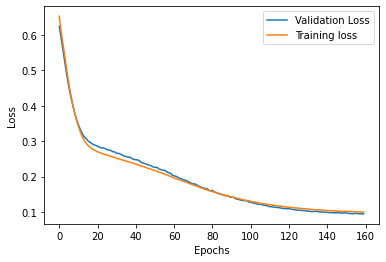

In [88]:
plt.plot(h['val_loss'], label= "Validation Loss")
plt.plot(h['loss'], label= 'Training loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

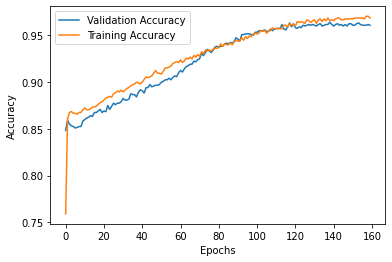

In [89]:
plt.plot(h['val_accuracy'], label= "Validation Accuracy")
plt.plot(h['accuracy'], label= 'Training Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [98]:
pred=model.predict(test)


array([0.999919], dtype=float32)

In [106]:
type(pred)

numpy.ndarray

In [108]:
Y_pred=np.around(pred)

In [110]:
label= Y_pred.astype(int)

In [115]:
df=pd.DataFrame(label)

In [117]:
df.columns=['label']

In [120]:
from google.colab import files
df.to_csv('Y_predictions.csv', index=False)
files.download('Y_predictions.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>